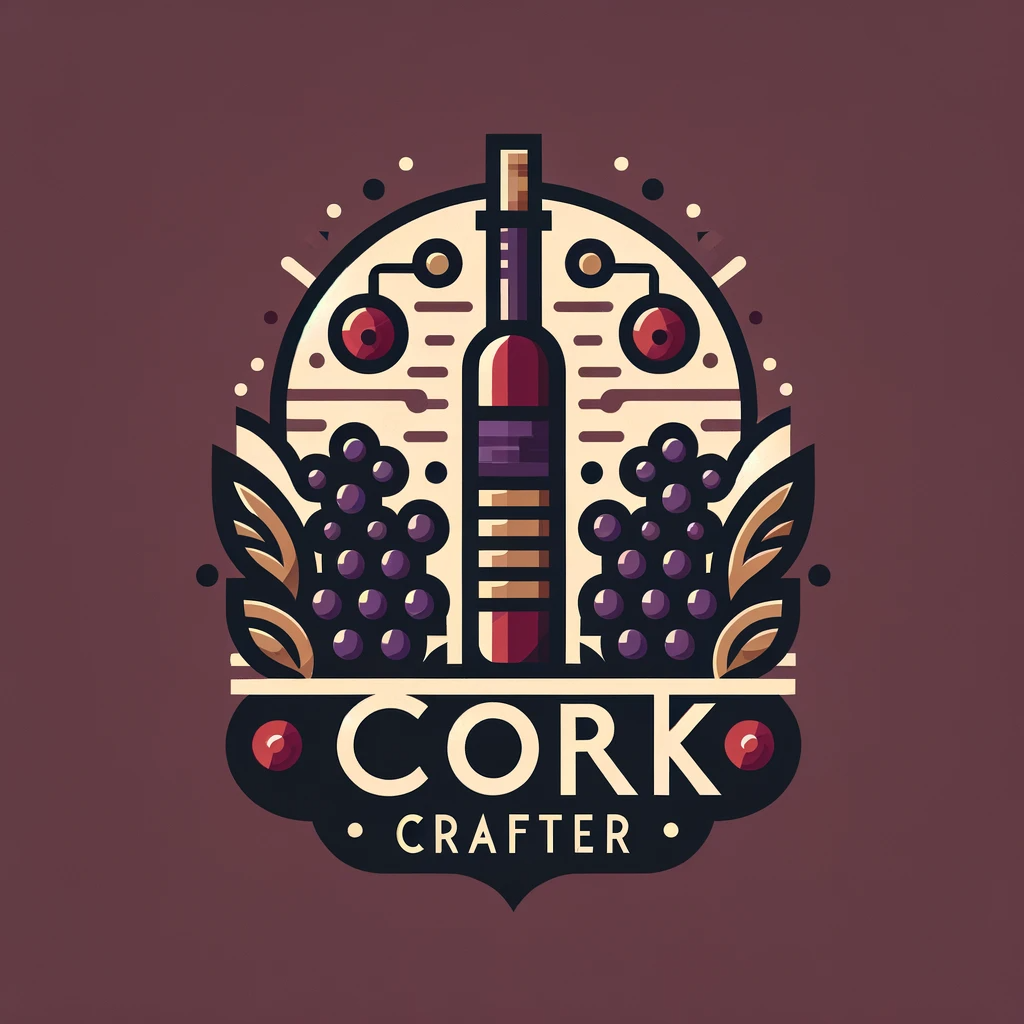


# CorkCrafter

**CorkCrafter**: *One stop solution to feeding your wine curiosities!*

---

Welcome to **CorkCrafter** - Your go-to destination for bespoke cork crafts!

Made with help of Grapes and SingleStore 😉!

Here you can not only craft your own wine and do a quality check but you can also learn about various wine charactersics that you might be unaware about.

In [154]:
!pip install langchain --quiet
!pip install lime --quiet
!pip install openai --quiet
!pip install pandas --quiet
!pip install scikit-learn --quiet
!pip install seaborn --quiet
!pip install shap --quiet
!pip install transformers --quiet
!pip install torch --quiet
!pip install wordcloud --quiet
!pip install ipython-sql psycopg2-binary --quiet
!pip install transformers torch --quiet
!pip install pandas numpy scikit-learn matplotlib seaborn


In [155]:
import pandas as pd

github_url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
wine_data = pd.read_csv(github_url)
wine_data[wine_data["quality"] > 6]

# Display the filtered DataFrame


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
7               7.3              0.65         0.00             1.2      0.065   
8               7.8              0.58         0.02             2.0      0.073   
16              8.5              0.28         0.56             1.8      0.092   
37              8.1              0.38         0.28             2.1      0.066   
62              7.5              0.52         0.16             1.9      0.085   
...             ...               ...          ...             ...        ...   
1541            7.4              0.25         0.29             2.2      0.054   
1544            8.4              0.37         0.43             2.3      0.063   
1549            7.4              0.36         0.30             1.8      0.074   
1555            7.0              0.56         0.17             1.7      0.065   
1584            6.7              0.32         0.44             2.4      0.061   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
7                    15.0                  21.0  0.99460  3.39       0.47   
8                     9.0                  18.0  0.99680  3.36       0.57   
16                   35.0                 103.0  0.99690  3.30       0.75   
37                   13.0                  30.0  0.99680  3.23       0.73   
62                   12.0                  35.0  0.99680  3.38       0.62   
...                   ...                   ...      ...   ...        ...   
1541                 19.0                  49.0  0.99666  3.40       0.76   
1544                 12.0                  19.0  0.99550  3.17       0.81   
1549                 17.0                  24.0  0.99419  3.24       0.70   
1555                 15.0                  24.0  0.99514  3.44       0.68   
1584                 24.0                  34.0  0.99484  3.29       0.80   

      alcohol  quality  
7       10.00        7  
8        9.50        7  
16      10.50        7  
37       9.70        7  
62       9.50        7  
...       ...      ...  
1541    10.90        7  
1544    11.20        7  
1549    11.40        8  
1555    10.55        7  
1584    11.60        7  

[217 rows x 12 columns]

# Red Wine Quality Prediction with Random Forest

In this notebook, we will explore the process of using a machine learning model to predict the quality of red wine based on its physicochemical properties. We will be using the RandomForestRegressor from scikit-learn, a popular machine learning library in Python.



In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Load the Dataset
# Replace 'winequality-dataset.csv' with the path to your dataset
github_url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
wine_data = pd.read_csv(github_url)

# Step 2: Explore the Data
wine_data.describe()

# Step 3: Preprocess the Data
# Assume no missing values and all features are numeric for simplicity
# Scaling the features
scaler = StandardScaler()
features = wine_data.drop('quality', axis=1)
scaled_features = scaler.fit_transform(features)
target = wine_data['quality']

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Step 5: Select a Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 6: Train the Model
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Optional Step 8: Fine-tune the Model
# Adjust parameters, or try different models and compare performance


RMSE: 0.5489561116337079


# Wine Quality Prediction Function

This section outlines the creation and utilization of a function to predict the quality of wine based on its physicochemical properties using a pre-trained machine learning model.

## Loading Pre-Trained Model and Scaler

Before using the prediction function, we need to load the pre-trained model and scaler. These are assumed to have been trained and saved previously using a machine learning algorithm (like RandomForestRegressor) and a feature scaling method (like StandardScaler) respectively.



**Quality Calculator**

In [157]:
import pandas as pd

def predict_wine_quality(fixed_acidity, volatile_acidity, citric_acid, residual_sugar, 
                         chlorides, free_sulfur_dioxide, total_sulfur_dioxide, 
                         density, ph, sulphates, alcohol):
    # Create a DataFrame from the input values with the correct column names
    input_data = pd.DataFrame([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, 
                               chlorides, free_sulfur_dioxide, total_sulfur_dioxide, 
                               density, ph, sulphates, alcohol]],
                              columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                                       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                                       'density', 'pH', 'sulphates', 'alcohol'])  # Adjust column names here

    # Normalize the input features using the pre-trained scaler
    scaled_input = scaler.transform(input_data)

    # Predict the quality using the trained model
    predicted_quality = model.predict(scaled_input)[0]  # [0] to get the single prediction value

    # Return the predicted quality
    return f"Predicted Wine Quality: {predicted_quality:.2f} "



**Example Usage**

In [158]:
print(predict_wine_quality(12,12,12,12,12,1,21,2,12,12,2))

Predicted Wine Quality: 5.22 


# Interactive Wine Quality Predictor

This tool allows users to predict the quality of wine based on various physicochemical properties. Users can select which properties they have information about and input their values. For unselected properties, the tool uses default values to make predictions.



## How It Works

1. **Selection of Parameters**: 
   - The tool presents a series of checkboxes, each corresponding to a different wine property such as fixed acidity, volatile acidity, citric acid, etc.
   - Users check the boxes next to the properties for which they have data.

2. **Input via Sliders**:
   - Upon confirming the selected parameters, sliders corresponding to the checked properties will appear.
   - These sliders allow users to input their values for each selected property.
   - For properties that are not selected, the tool uses predefined default values.

3. **Prediction**:
   - After inputting their data, users can click the "Predict Wine Quality" button.
   - The tool then predicts the wine quality based on the input values and displays the result.
   - A special message is shown alongside the predicted quality score, indicating the quality of the wine.

## Technical Implementation

- The tool is implemented using `ipywidgets` in Python, which provides interactive widgets for Jupyter notebooks.
- It consists of checkboxes for parameter selection, sliders for input, and a button to trigger the prediction.
- The `predict_wine_quality` function, which is assumed to be predefined, performs the actual quality prediction.
- Default values are defined for each wine property to ensure the tool can make a prediction even with partial data input.

This interactive tool simplifies the process of wine quality prediction, making it accessible to both experts and enthusiasts alike.

In [159]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define checkboxes for each feature
checkboxes = {
    'fixed_acidity': widgets.Checkbox(description='Fixed Acidity', value=False),
    'volatile_acidity': widgets.Checkbox(description='Volatile Acidity', value=False),
    'citric_acid': widgets.Checkbox(description='Citric Acid', value=False),
    'residual_sugar': widgets.Checkbox(description='Residual Sugar', value=False),
    'chlorides': widgets.Checkbox(description='Chlorides', value=False),
    'free_sulfur_dioxide': widgets.Checkbox(description='Free Sulfur Dioxide', value=False),
    'total_sulfur_dioxide': widgets.Checkbox(description='Total Sulfur Dioxide', value=False),
    'density': widgets.Checkbox(description='Density', value=False),
    'ph': widgets.Checkbox(description='pH', value=False),
    'sulphates': widgets.Checkbox(description='Sulphates', value=False),
    'alcohol': widgets.Checkbox(description='Alcohol', value=False)
}

# Define sliders for each feature
sliders = {
    'fixed_acidity': widgets.FloatSlider(value=7.4, min=0, max=15, step=0.1, description='Fixed Acidity', disabled=True),
    'volatile_acidity': widgets.FloatSlider(value=0.7, min=0, max=2, step=0.01, description='Volatile Acidity', disabled=True),
    'citric_acid': widgets.FloatSlider(value=0, min=0, max=1, step=0.01, description='Citric Acid', disabled=True),
    'residual_sugar': widgets.FloatSlider(value=2, min=0, max=15, step=0.1, description='Residual Sugar', disabled=True),
    'chlorides': widgets.FloatSlider(value=0.08, min=0, max=0.2, step=0.001, description='Chlorides', disabled=True),
    'free_sulfur_dioxide': widgets.FloatSlider(value=15, min=0, max=70, step=1, description='Free Sulfur Dioxide', disabled=True),
    'total_sulfur_dioxide': widgets.FloatSlider(value=45, min=0, max=300, step=1, description='Total Sulfur Dioxide', disabled=True),
    'density': widgets.FloatSlider(value=0.994, min=0.98, max=1.005, step=0.0001, description='Density', disabled=True),
    'ph': widgets.FloatSlider(value=3.2, min=2.5, max=4.0, step=0.01, description='pH', disabled=True),
    'sulphates': widgets.FloatSlider(value=0.65, min=0, max=2, step=0.01, description='Sulphates', disabled=True),
    'alcohol': widgets.FloatSlider(value=10, min=8, max=15, step=0.1, description='Alcohol', disabled=True)
}

# Define default values for each feature
default_values = {
    'fixed_acidity': 7.4,
    'volatile_acidity': 0.7,
    'citric_acid': 0.3,
    'residual_sugar': 2.0,
    'chlorides': 0.08,
    'free_sulfur_dioxide': 15,
    'total_sulfur_dioxide': 45,
    'density': 0.994,
    'ph': 3.2,
    'sulphates': 0.65,
    'alcohol': 10.0
}

confirm_button = widgets.Button(description="Confirm Parameters")

# Output for displaying sliders
parameter_output = widgets.Output()

# Function to create and display sliders based on selected parameters
def on_confirm_button_clicked(b):
    with parameter_output:
        clear_output(wait=True)
        active_sliders = []
        for param, checkbox in checkboxes.items():
            if checkbox.value:  # If the checkbox is checked
                sliders[param].disabled = False  # Enable the slider
                active_sliders.append(sliders[param])
            else:
                sliders[param].disabled = True  # Disable the slider
        display(widgets.VBox(active_sliders))

confirm_button.on_click(on_confirm_button_clicked)

# Display checkboxes, button, and output for sliders
param_selection_layout = widgets.VBox([*checkboxes.values(), confirm_button, parameter_output])
display(param_selection_layout)

# Define an output widget to display the results of prediction
output = widgets.Output()

# Create a button to trigger the prediction
predict_button = widgets.Button(description="Predict Wine Quality")
display(predict_button, output)

def interactive_predict(b):
    with output:
        clear_output(wait=True)  # Clear the previous output

        # Collect values from active sliders or use default values
        input_values = {param: sliders[param].value if not sliders[param].disabled else default_values[param] for param in sliders}

        # Call the prediction function with the collected values
        result = predict_wine_quality(**input_values)

        # Parse the predicted quality value from the result string
        predicted_quality = float(result.split(": ")[-1])

        # Display a custom message based on the predicted quality
        if predicted_quality > 6:
            print(f'{result} \n 🎉 Your wine quality is great! 🍷')
        else:
            print(f'{result}\n 🥲 Not good enough.\n You can always make a better wine! 🍷')  # Display the regular result


predict_button.on_click(interactive_predict)

Button(description='Predict Wine Quality', style=ButtonStyle())

Output()

# Data Analysis for Wine Quality Dataset

This analysis explores a dataset containing various physicochemical properties of wines and their corresponding quality ratings. The goal is to understand the factors that influence wine quality and potentially develop a predictive model.



**Anomaly detection**

We use the Isolation Forest algorithm, an effective method for identifying anomalies in high-dimensional datasets. The steps are as follows:


In [160]:
from sklearn.preprocessing import StandardScaler

# Handling missing values (if any)
# wine_data = wine_data.fillna(method='ffill').fillna(method='bfill')

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine_data)


In [161]:
from sklearn.ensemble import IsolationForest

# Initialize the model
iso_forest = IsolationForest(contamination=0.01)  # contamination is the expected proportion of outliers

# Fit the model
iso_forest.fit(scaled_data)


IsolationForest(contamination=0.01)

In [162]:
labels = iso_forest.predict(scaled_data)
wine_data['anomaly'] = labels
anomalies = wine_data[wine_data['anomaly'] == -1]


In [163]:
print(anomalies)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
94              5.0             1.020         0.04             1.4      0.045   
106             7.8             0.410         0.68             1.7      0.467   
151             9.2             0.520         1.00             3.4      0.610   
353            13.5             0.530         0.79             4.8      0.120   
442            15.6             0.685         0.76             3.7      0.100   
515             8.5             0.655         0.49             6.1      0.122   
652            15.9             0.360         0.65             7.5      0.096   
1079            7.9             0.300         0.68             8.3      0.050   
1081            7.9             0.300         0.68             8.3      0.050   
1235            6.0             0.330         0.32            12.9      0.054   
1244            5.9             0.290         0.25            13.4      0.067   
1319            9.1         

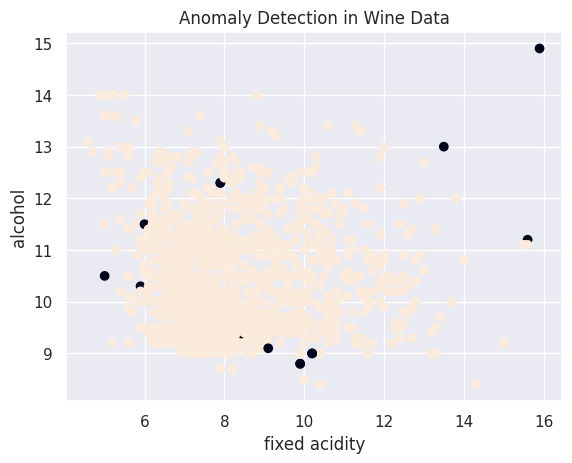

In [164]:
import matplotlib.pyplot as plt

feature_x = 'fixed acidity'  
feature_y = 'alcohol'       

plt.scatter(wine_data[feature_x], wine_data[feature_y], c=labels)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title('Anomaly Detection in Wine Data')
plt.show()


**Feature Importance Analysis**

We use a RandomForestRegressor, a powerful and versatile machine learning model, for this analysis. Random Forest is particularly well-suited for this task as it provides intrinsic methods for evaluating feature importance.


In [165]:
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']  # Target



In [166]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(X, y)


RandomForestRegressor(random_state=42)

In [167]:
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=["Importance"]).sort_values("Importance", ascending=False)

print(feature_importances)


                      Importance
alcohol                 0.277656
sulphates               0.139551
volatile acidity        0.127235
total sulfur dioxide    0.078482
chlorides               0.063319
pH                      0.060232
density                 0.053792
residual sugar          0.052546
fixed acidity           0.050027
citric acid             0.048661
free sulfur dioxide     0.046672
anomaly                 0.001827


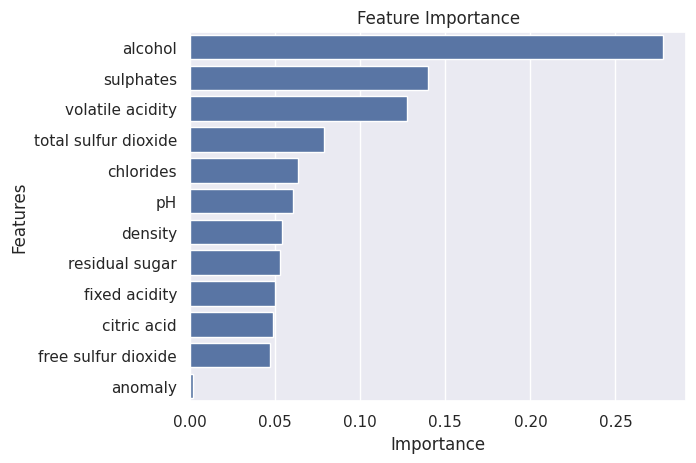

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# Visualisation

To better understand the distribution of each feature in the wine dataset, we visualize the data using histograms. Histograms are a fundamental tool in exploratory data analysis, providing insights into the distribution and frequency of data points across different ranges.

## Approach

We use seaborn and matplotlib libraries for visualization. Seaborn is a powerful Python visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

### Graphs

1. **Aesthetic Style Histrogram**:
   - We set the aesthetic style of the plots using `sns.set()`. This step enhances the visual appeal of the plots generated by seaborn and matplotlib.

   ```python
   import seaborn as sns
   sns.set()


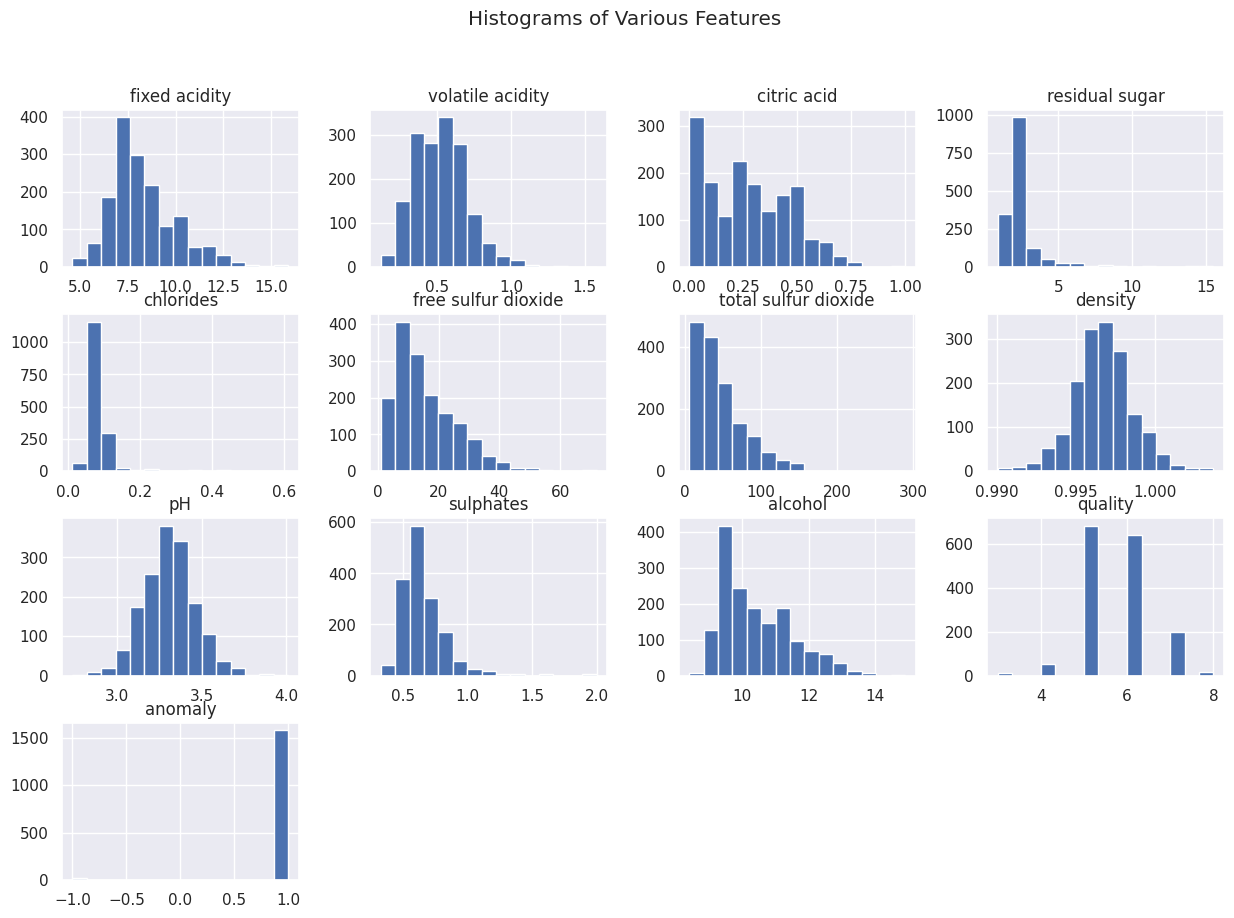

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set()

# Plotting histograms for each feature
wine_data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Various Features")
plt.show()


2. **Creating the Box Plots**:
   - We use the `plot` method of the pandas DataFrame to generate box plots for each feature in the `wine_data` dataset.
   - The `kind='box'` argument specifies that we want to create box plots.
   - The `subplots=True` argument indicates that each feature should have its own separate plot.
   - The `layout` parameter determines how the subplots are arranged. In this case, they are arranged in a 4x3 grid.
   - `sharex=False` and `sharey=False` ensure that each subplot has its own scale for the x-axis and y-axis, respectively.
   - The `figsize` parameter sets the size of the entire grid of plots.

   ```python
   import matplotlib.pyplot as plt
   wine_data.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(15, 10))


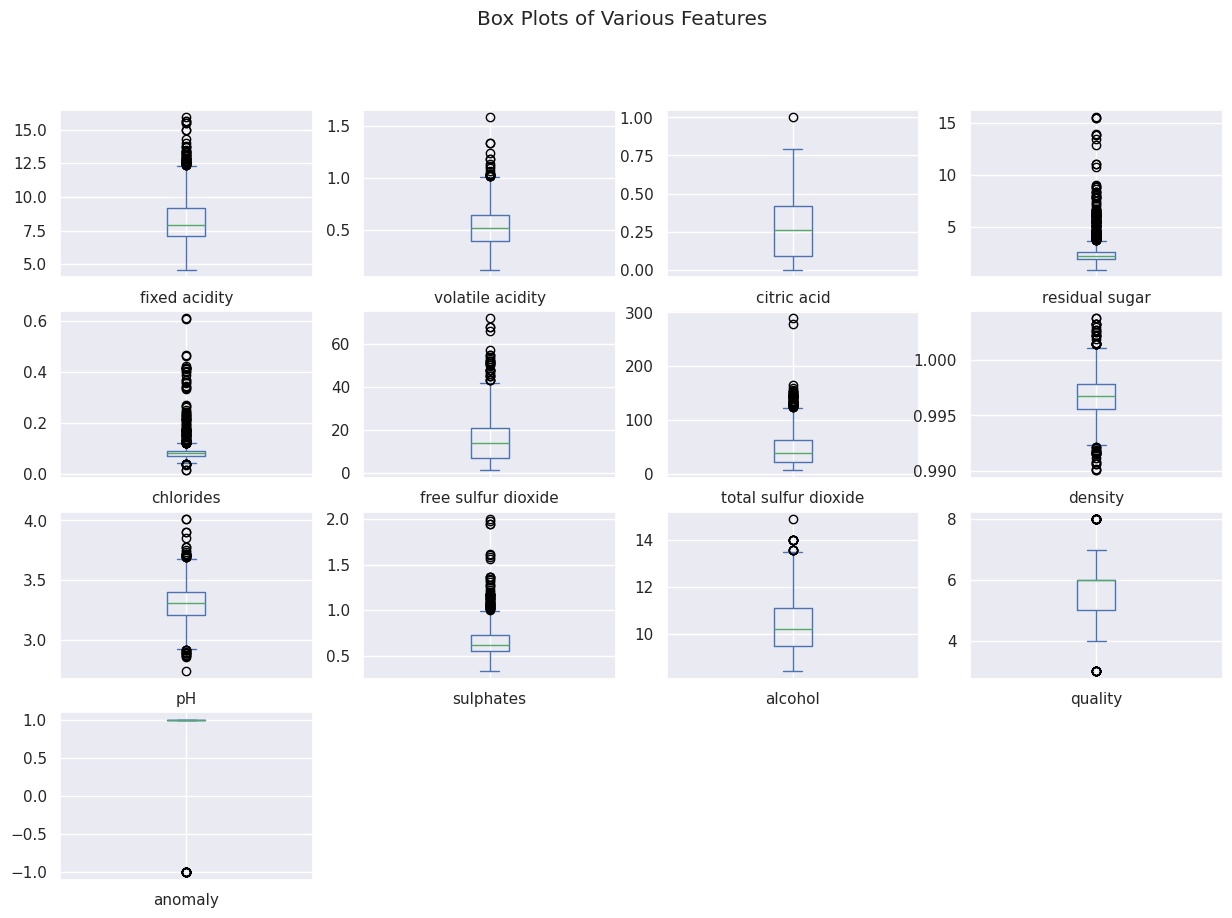

In [170]:
# Plotting box plots for each feature
wine_data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle("Box Plots of Various Features")
plt.show()


3. **Calculating the Correlation Matrix**:
   - We use the `corr` method on the `wine_data` DataFrame to compute the pairwise correlation of all columns.
   - The correlation values range from -1 to 1, where:
     - `1` indicates a strong positive correlation.
     - `-1` indicates a strong negative correlation.
     - `0` indicates no correlation.
   - This matrix helps in understanding the bivariate relationships between different features.

   ```python
   corr = wine_data.corr()

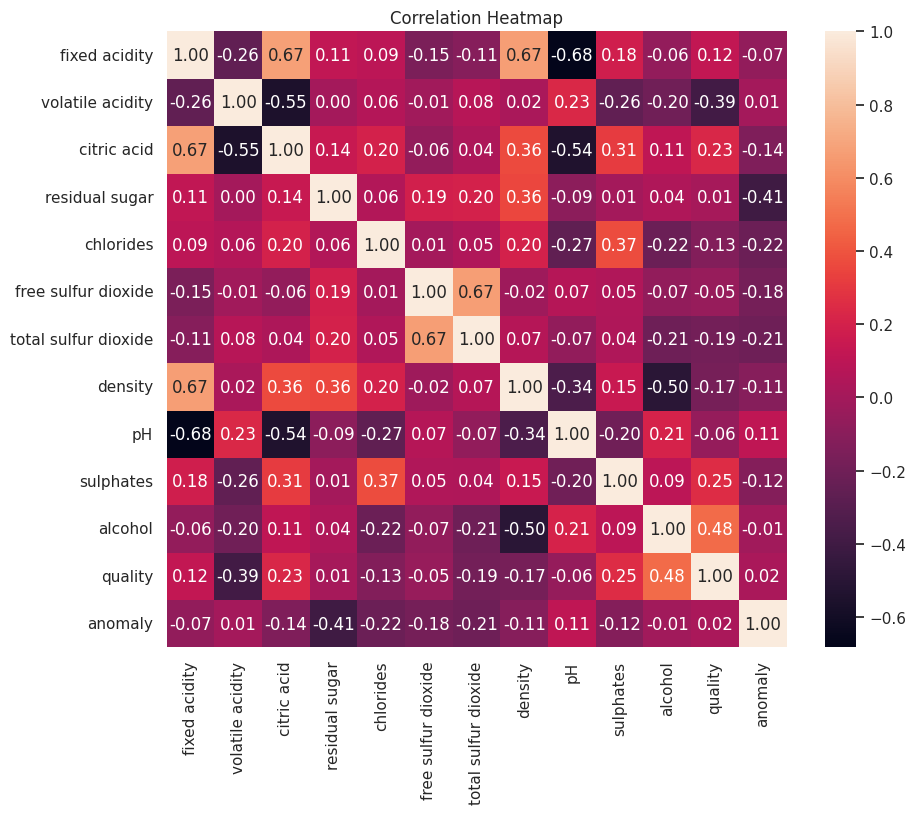

In [171]:
# Correlation matrix
corr = wine_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


4. **Generating the Pair Plot**:
   - We utilize seaborn's `pairplot` function to create a grid of scatter plots.
   - Each plot in the grid shows the relationship between two features of the `wine_data` DataFrame.
   - The diagonal of the grid often contains the univariate distribution of the variable in that column.

   ```python
   import seaborn as sns
   import matplotlib.pyplot as plt
   sns.pairplot(wine_data)


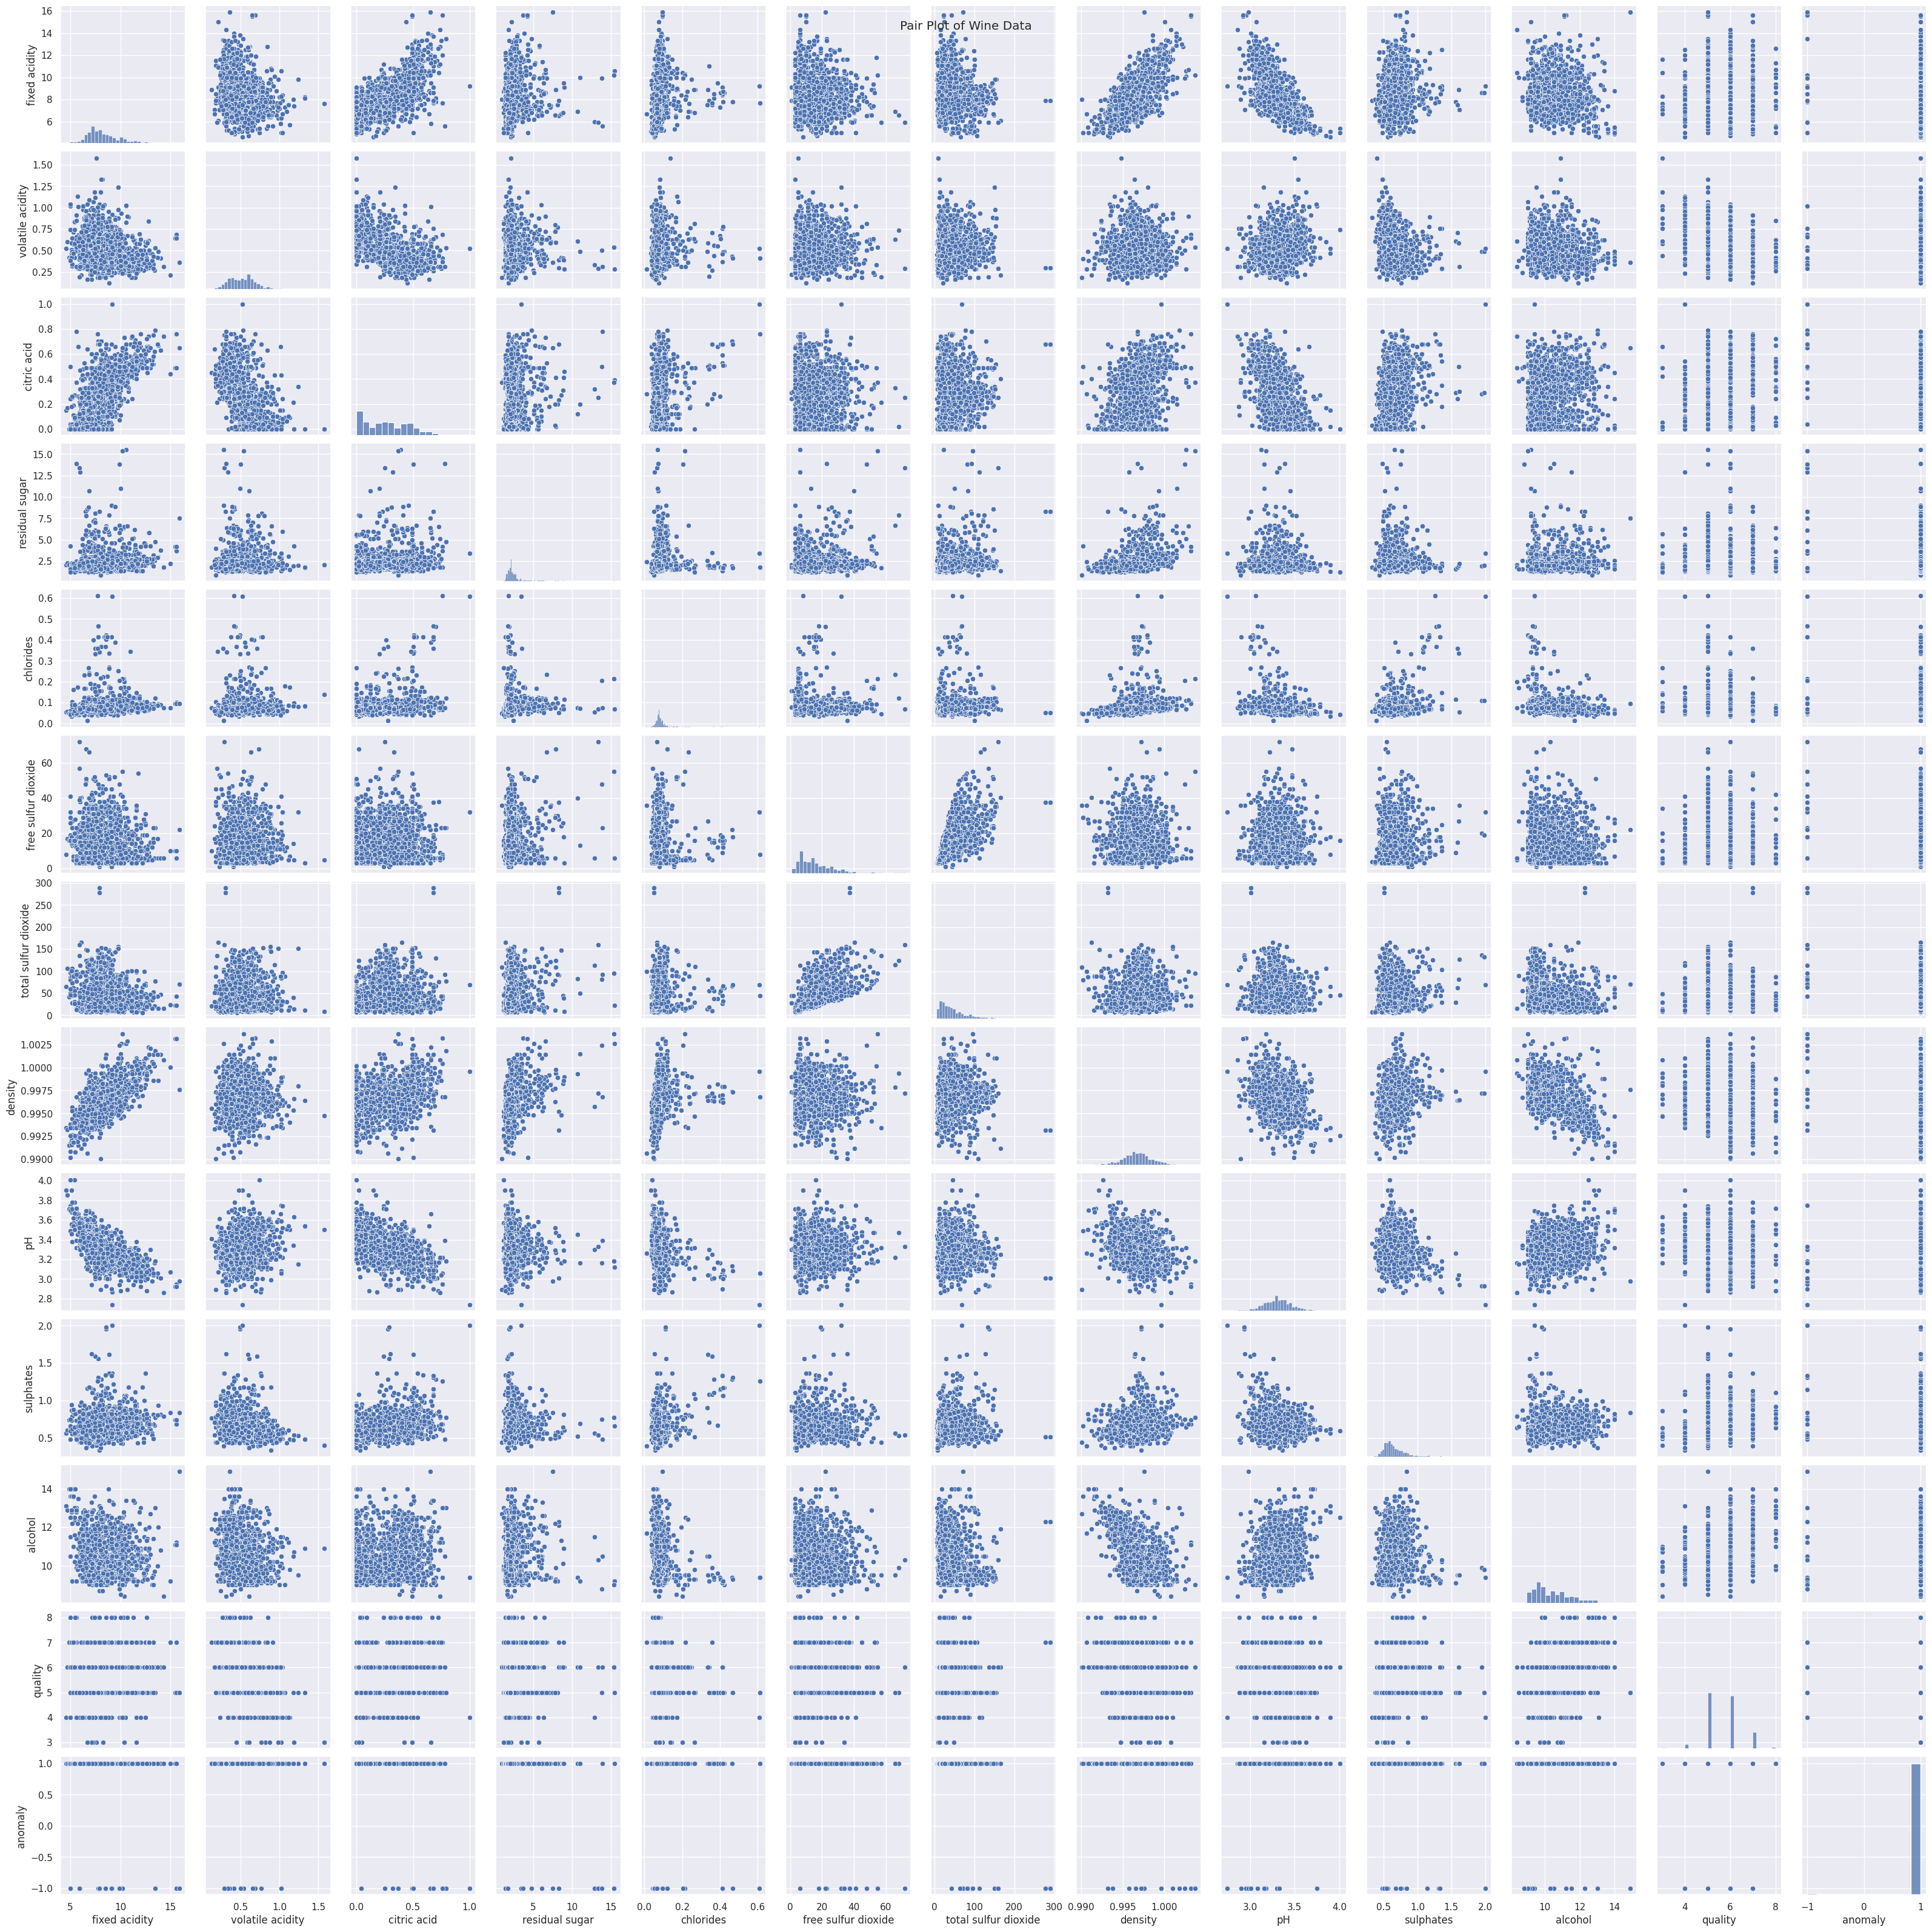

In [172]:
# Plotting a pair plot
sns.pairplot(wine_data)
plt.suptitle("Pair Plot of Wine Data")
plt.show()


3. **Identifying Features**:
   - We extract all the features from the `wine_data` DataFrame, excluding the 'quality' column which is our target variable.
   - The goal is to plot each of these features against the wine quality.

   ```python
   features = wine_data.columns[:-1]  # Excluding the 'quality' column


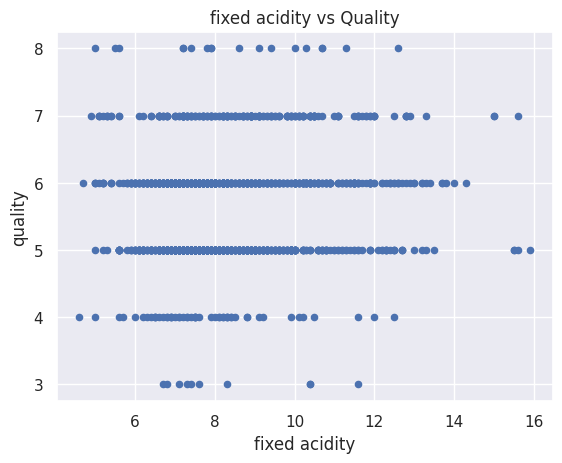

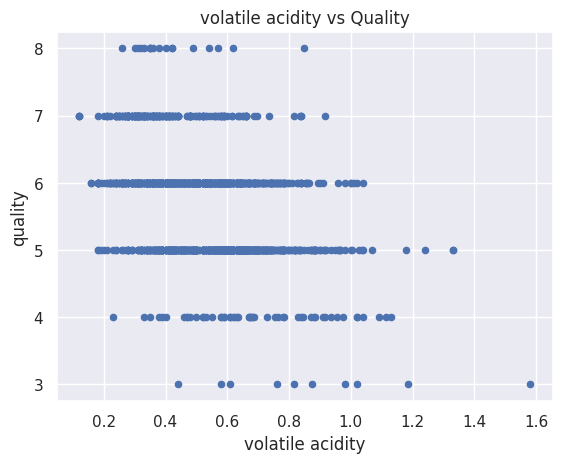

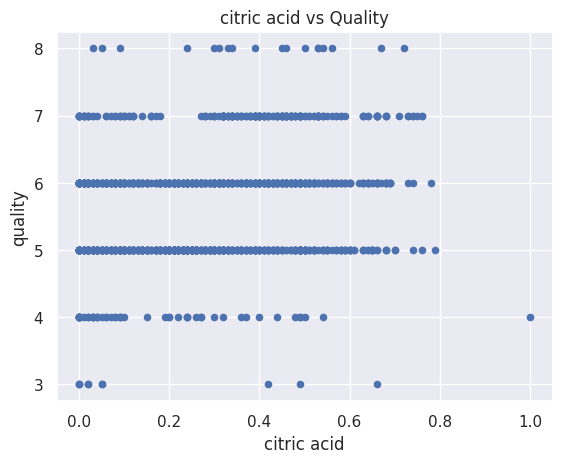

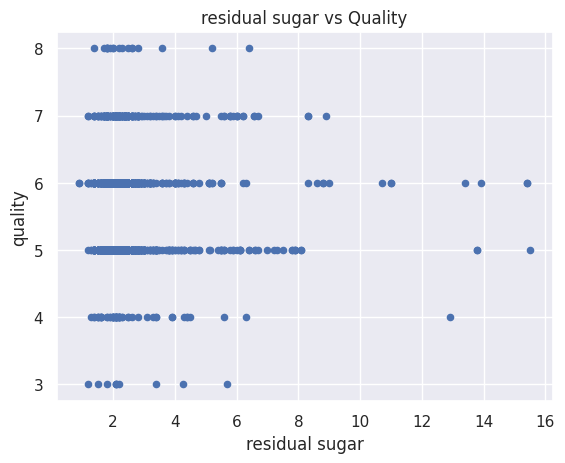

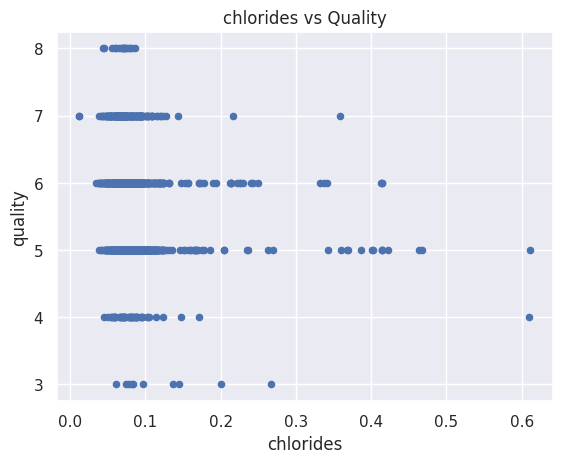

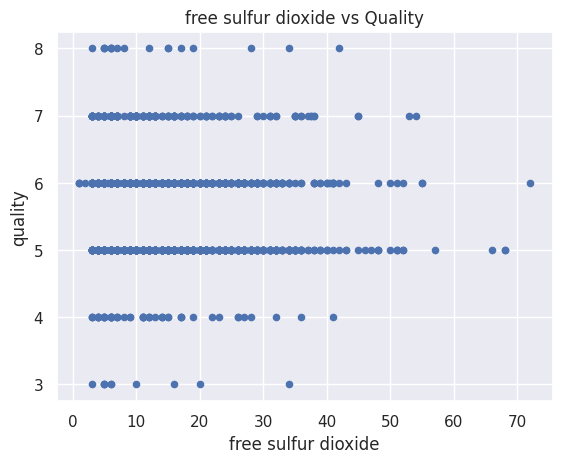

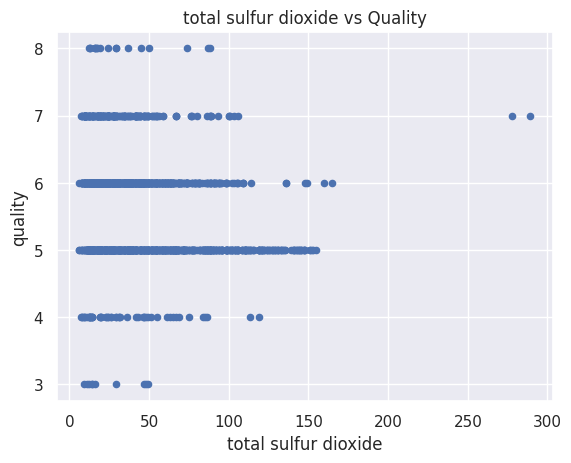

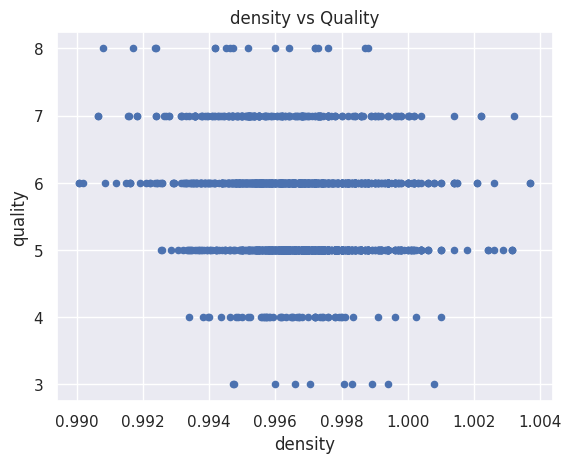

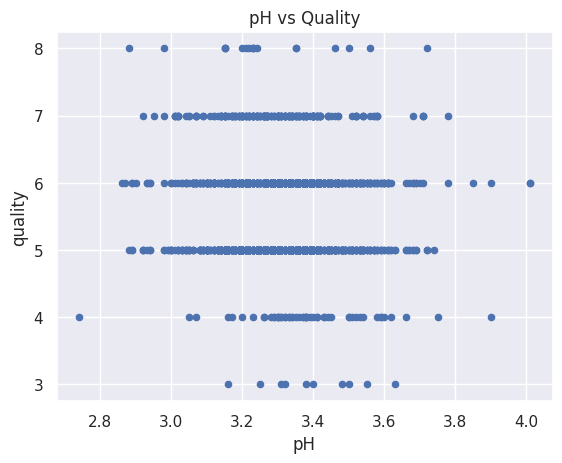

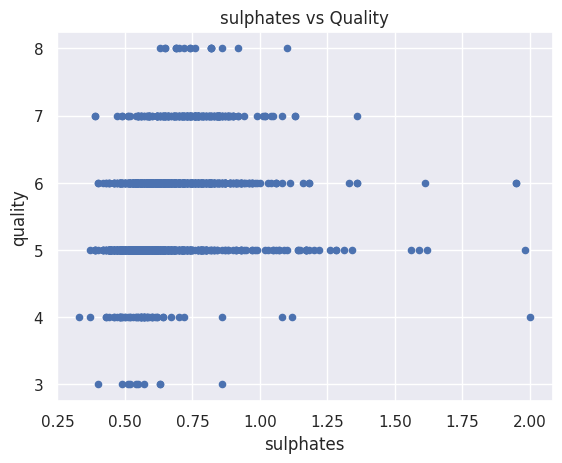

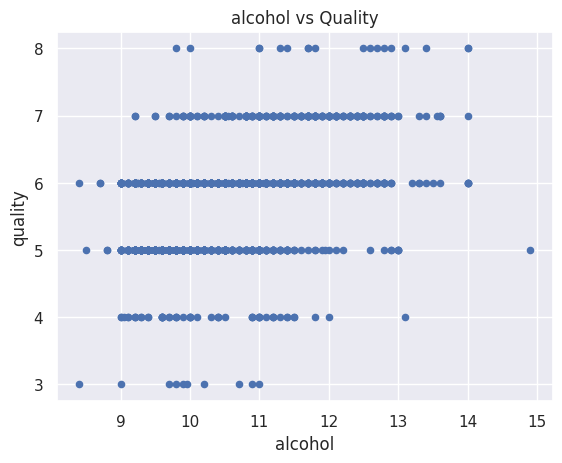

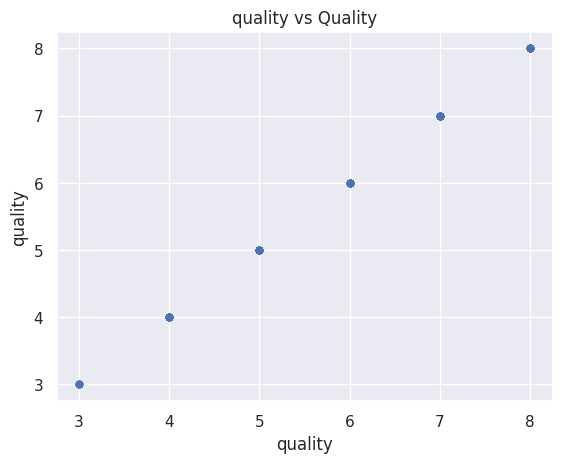

In [173]:
# Scatter plots for each feature against quality
features = wine_data.columns[:-1]  # Excluding the 'quality' column
for feature in features:
    wine_data.plot(kind='scatter', x=feature, y='quality')
    plt.title(f"{feature} vs Quality")
    plt.show()


# Descriptive Analysis

In [174]:
import numpy as np

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(wine_data.head())

# Compute and display descriptive statistics
print("\nDescriptive Statistics:")
print(wine_data.describe())

# For a more detailed summary including the mode
print("\nMore Detailed Summary:")
summary = wine_data.describe(include='all')
summary.loc['mode'] = wine_data.mode().iloc[0]
print(summary)


First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  anomaly  
0      9.4        5     

# Conclusion

In this notebook, we embarked on a journey to understand and predict red wine quality through the 'Cork Crafter' project. Here are our key takeaways:

- **Predictive Modeling**: Using the Random Forest algorithm, we developed a robust model for predicting the quality of red wine. This model not only aids in quality assessment but also helps in understanding the factors influencing wine quality.

- **Interactive Prediction Tool**: We introduced an interactive tool for wine quality prediction, making the process user-friendly and accessible to non-technical users.

- **In-depth Data Analysis**: Our analysis, including anomaly detection and feature importance, provided valuable insights into the wine quality dataset. It highlighted crucial factors that play a significant role in determining wine quality.

- **Learning and Challenges**: Throughout this project, we deepened our understanding of machine learning algorithms and data analysis techniques. We also encountered and overcame various challenges, enhancing our problem-solving skills.

As we conclude, it's clear that the 'Cork Crafter' project not only serves as a practical tool for wine quality prediction but also as a platform for learning and exploration in the field of data science and machine learning. Future work could focus on expanding the dataset, refining the model, and exploring other predictive algorithms to enhance accuracy and reliability.

Thank you for joining us on this vinous adventure!
